**Rimbésougri** & **Alenka** vous présentent :

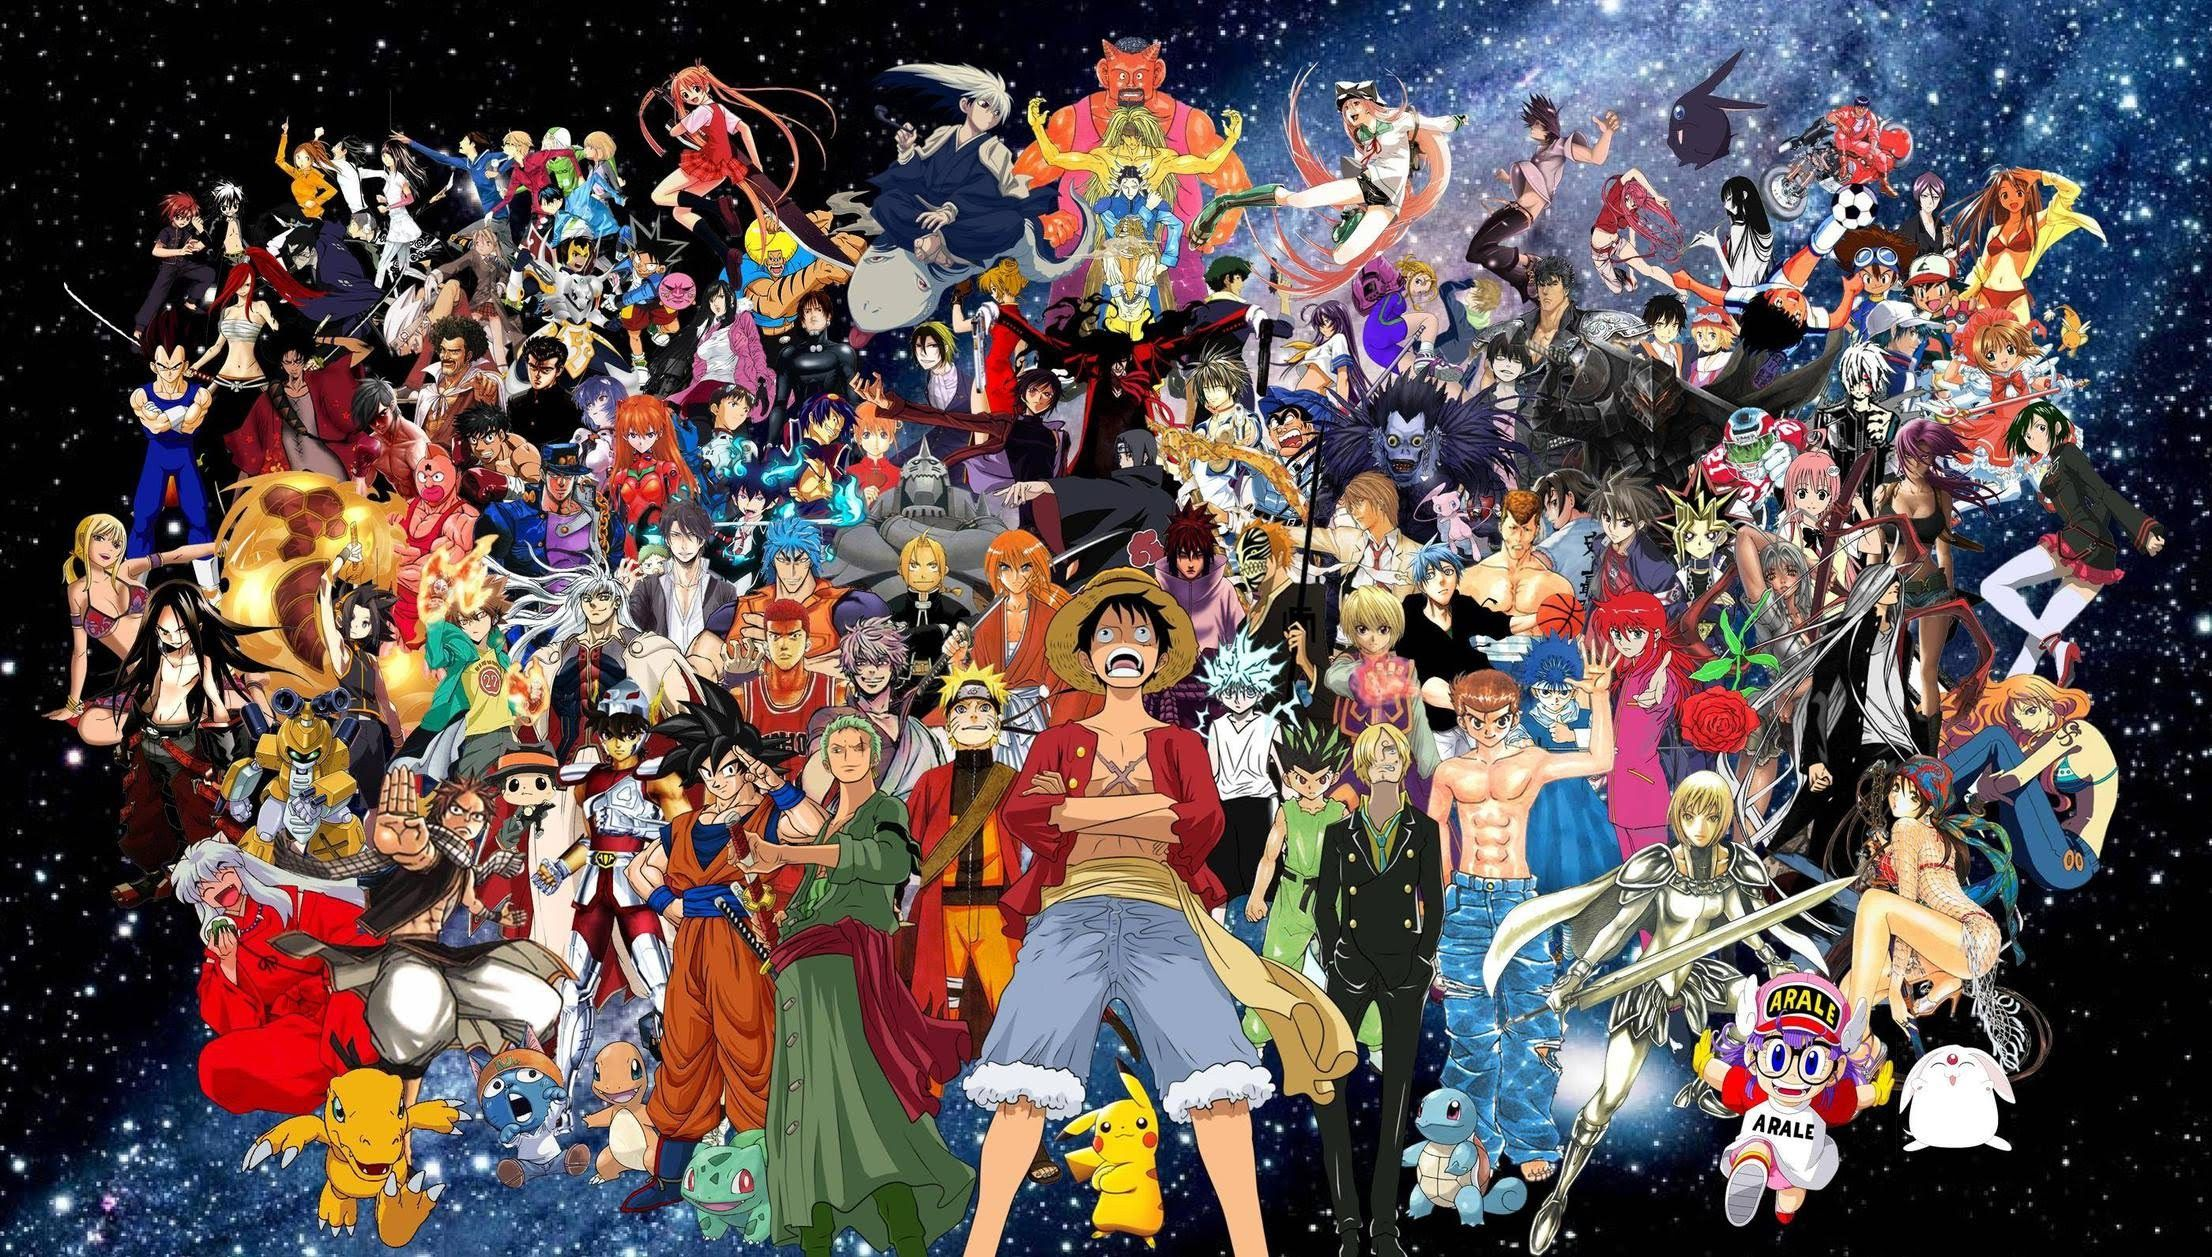

In [10]:
import IPython
url='https://i.pinimg.com/originals/3d/4f/a7/3d4fa7d402febdd1c38bb6280452377a.jpg'
IPython.display.Image(url, width = 1000)

# <center> Séries temporelles </center>
# <center> Projet de DATA ANALYSE </center>

# <center> Analyse Statistique des Animés</center>





   Dans ce présent projet vous allez entrer dans le monde des Otakus. <br/>
    <br/>
**Otaku** est un terme désignant une personne qui consacre une grande partie de son temps à une activité d'intérieur, comme les bandes dessinées, les mangas, les dessins animés ou les films, la cuisine, le dessin, ou encore les jeux vidéo, liée à **la culture du Japon**.

## 1. Présentation du contexte des données

La base de données choisi contient des informations sur les **Animés**. Les Animés sont les séries d'animation ou les films d'animation produit au Japon. 
On y trouve les titres des Animés, leur popularité, leurs genres, le nombres d'épisodes produits, leur studio, etc.  



## 2. Présentation des données

 

Les données sont contenu dans un fichier csv  nommé **anime_cleaned** qui contient **6669** lignes et **33** colonnes. 

Chaque ligne contient des informations sur un amine. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # Pour obtenir des pourcentages dans les graphes

from IPython.core.display import display, HTML # Pour afficher les images

In [5]:
animes = pd.read_csv('anime_cleaned.csv')
animes = animes.set_index('anime_id')
print("Présentation de la base de données (les 10 premières lignes) ")
display( animes.head(10) )

Présentation de la base de données (les 10 premières lignes) 


,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
anime_id,,,,,,,,,,,,,,,,,,,,,
11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0
6586,Yume-iro Pâtissière,NaN,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,50,Finished Airing,False,...,Unknown,"{'Adaptation': [{'mal_id': 10386, 'type': 'man...","Yomiuri Telecasting, DAX Production, Shueisha",NaN,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S...",24.0,2009.0
178,Ultra Maniac,Ultramaniac - Magical Girl,ウルトラマニアック,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,...,Tuesdays at 22:00 (JST),"{'Adaptation': [{'mal_id': 956, 'type': 'manga...","WAO World, Studio Jack","Discotek Media, Geneon Entertainment USA",Production Reed,"Magic, Comedy, Romance, School, Shoujo","['""Kagami no Naka"" by can/goo']","['""Hitotsu=Unmei Kyoudoutai"" by can/goo']",24.0,2003.0
2787,Shakugan no Shana II (Second),Shakugan no Shana: Season II,灼眼のシャナII –Second–,Shakugan no Shana 2,https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,24,Finished Airing,False,...,Fridays at 01:25 (JST),"{'Adaptation': [{'mal_id': 3074, 'type': 'mang...","Geneon Universal Entertainment, ASCII Media Works",Funimation,J.C.Staff,"Action, Drama, Fantasy, Romance, School, Super...","['#1: ""JOINT"" by Mami Kawada (eps 1-15)', '#2:...","['#1: ""Triangle"" by Kawada Mami (eps 1-15)', '...",24.0,2007.0
4477,Nodame Cantabile: Paris-hen,NaN,のだめカンタービレ 巴里編,"Nodame Cantabile Paris Chapter, Nodame Cantabi...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,11,Finished Airing,False,...,Fridays at 00:45 (JST),"{'Adaptation': 

In [6]:
print("Les différentes colonnes de notre tableau\n")
print(animes.columns )

Les différentes colonnes de notre tableau

Index(['title', 'title_english', 'title_japanese', 'title_synonyms',
       'image_url', 'type', 'source', 'episodes', 'status', 'airing',
       'aired_string', 'aired', 'duration', 'rating', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year'],
      dtype='object')


## 3. Manipulation des données - visualisations et interprétation des données



Nous effaçons toutes les colonnes que nous n'utiliserons pas.

In [5]:
animes= animes.drop(['title_english', 'title_japanese', 'title_synonyms',
       'aired_string', 'aired', 'score', 'scored_by', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 
       'opening_theme', 'ending_theme', 'duration_min'], axis=1)

In [6]:
print("Liste des colonnes gardées pour l'étude")
animes.columns

Liste des colonnes gardées pour l'étude


Index(['title', 'image_url', 'type', 'source', 'episodes', 'status', 'airing',
       'duration', 'rating', 'rank', 'popularity', 'members', 'studio',
       'genre', 'aired_from_year'],
      dtype='object')

Dans le but de mieux comprendre la popularité de certains animés, nous allons étudier plusieurs paramètres de notre base de données. 

### Les genres d'animés

Dans cette partie, nous cherchons à connaitre les genres d'animé les plus récurrents dans le monde de l'animation japonaise.

In [7]:
animes = animes.rename(columns={'genre': 'genres', 'studio': 'studios'}) #On renomme 2 colonnes

animes['genres'].value_counts()
# Etant donnee que un anime peut etre associe a plusieurs genre,
# Le but de ces lignes suivantes est d'obtenir pour un anime donne l'ensemble de ses genre mais de facon separee
# on obtient un tableau avec un plus grand nombre de lignes
# un anime apparaitra autant de fois qu'il aura de genres
genres_arr = animes['genres'].str.replace(' ', '').str.split(',', expand=True).stack().reset_index(drop=True, level=1).to_frame(name='genre')
#animes['genres'].str.replace(' ', '') = Remplace les ' ' par ''
#animes['genres'].str.replace(' ', '').str.split(',', expand=True) = Cree un tableau avec des colonnes correspondant a un genre different
#stack() : compile les colonnes
#reset_index(drop=True, level=1) Supprime les indes
#to_frame(name='genre') : Cree un tableau 

genres_arr.index.name = 'anime_id' # pour permettre la jointure
animes_genres = pd.merge(animes, genres_arr, how='left', left_index=True, right_index=True)

In [8]:
print('Nombre de genres')
print(animes_genres['genre'].unique().size)

Nombre de genres
44


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

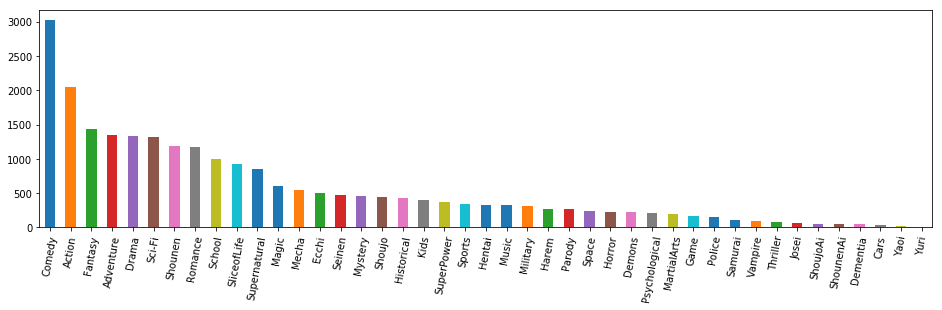

In [9]:
animes_genres['genre'].value_counts().plot(kind='bar', figsize=(16, 4))
plt.xticks(rotation=80)

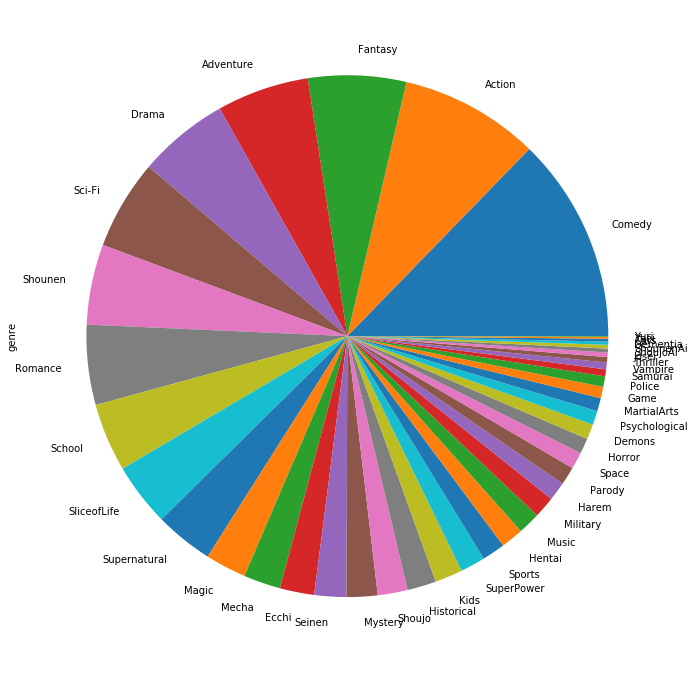

In [10]:
animes_genres['genre'].value_counts().plot.pie(figsize=(12, 12))

On voit que les genres d'animés les plus produits sont la **comédie** et **action**.


### Rating ( public cible )
Dans cette partie du travail nous nous intéresserons au public ciblé par ces productions d'animés.

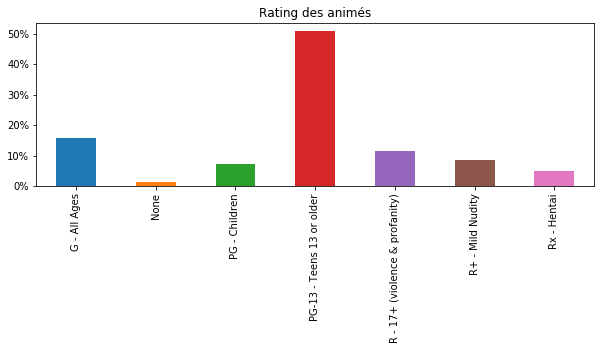

In [11]:
(animes['rating'].value_counts() / animes.shape[0]).sort_index().plot.bar(figsize=(10, 3), title='Rating des animés')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

Sur ce graphique on remarque que les animés ciblant des publics très restreints tel que les productions pour les jeunes enfants (PG - Children) ou celles à caractère pornographique (Rx - Hentai) représentent une proportion moindre par rapport celles visant les 13 ans et plus (PG-13) qui représente un audimat plus large.

Mais quels sont les styles, genres d'animés qui sont les plus suivies par ces catégories d'âge ?

### Genre et Ratings

Dans l'objectif d'obtenir une réponse à cette interrogation nous avons réalisé un croisement entre le 'genre' et les 'ratings' .

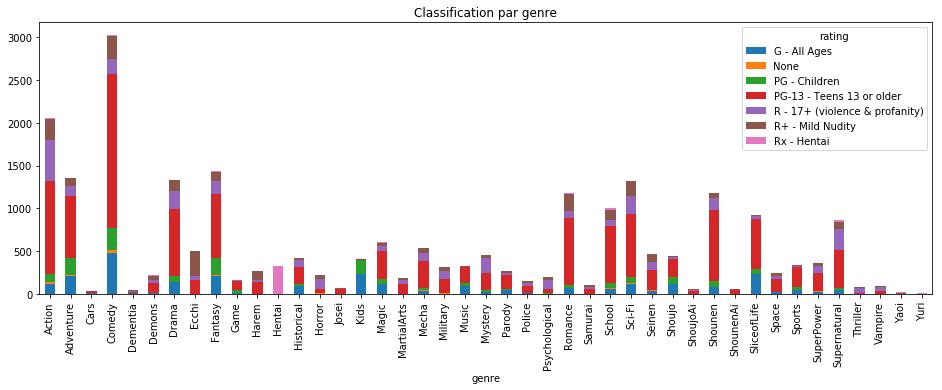

In [12]:
genre_ranks = pd.crosstab(animes_genres['genre'], animes_genres['rating'])
genre_ranks.plot(kind='bar', stacked=True, figsize=(16, 5), title='Classification par genre')

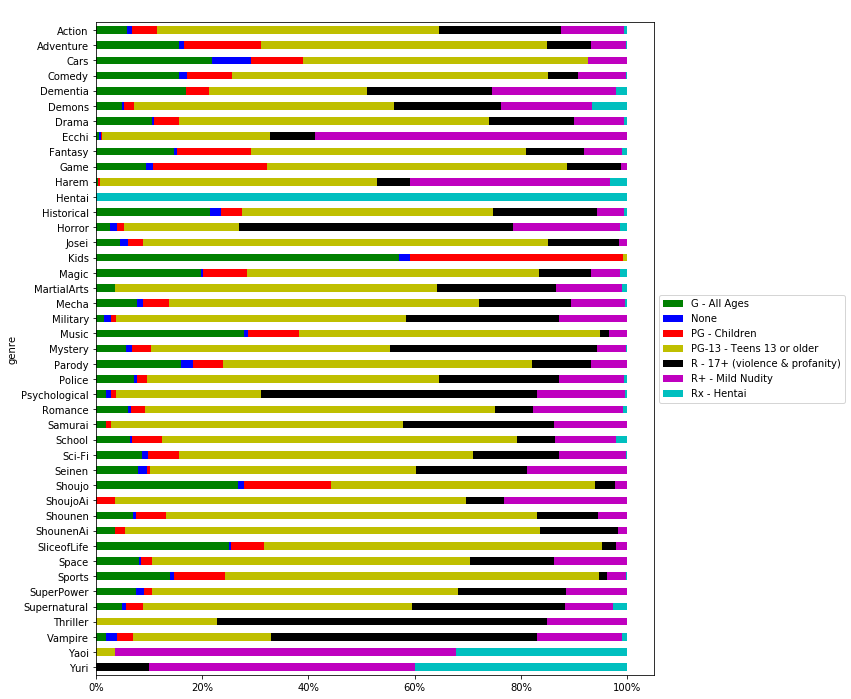

In [13]:
genre_ranks.div(genre_ranks.sum(axis=1), axis=0).sort_index(ascending=False).plot(kind='barh', stacked=True, figsize=(10, 12), title=' ',color='gbrykmc' )
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

In [14]:
animes[ animes['title']=='Naruto' ]['genres']

anime_id
20    Action, Adventure, Comedy, Super Power, Martia...
Name: genres, dtype: object

Les 13 ans et plus regardent quasiment tous les genres d'animés. On ne peut pas leur attribuer un genre qui leur plaît plus que les autres, raison pour laquelle on retrouve des combinaisons de genres dans un seul animé. C'est le cas de *Naruto* qui mélange Action, Aventure, Comedie, Super Pouvoir, Arts Martiaux. 

### Les studios d'animation

Ici, nous étudierons les studios d'animation et leurs productions.

In [15]:
print('Nombre de studios d\'animation')
print(animes['studios'].unique().size)

Nombre de studios d'animation
711


In [16]:
print("Classement des studios les plus prolifiques en terme de production d'animés")
display ( animes['studios'].value_counts().sort_values(ascending=False) )# On liste les studios d'animés les plus prolifiques

Classement des studios les plus prolifiques en terme de production d'animés


Toei Animation                            403
Sunrise                                   277
Madhouse                                  243
Studio Pierrot                            235
J.C.Staff                                 233
Studio Deen                               204
Production I.G                            178
A-1 Pictures                              159
TMS Entertainment                         155
OLM                                       135
Shaft                                     108
Gonzo                                     107
Nippon Animation                          107
Bones                                     103
Kyoto Animation                            97
DLE                                        90
Xebec                                      88
AIC                                        84
Brain&#039;s Base                          79
Tatsunoko Production                       69
Silver Link.                               66
Satelight                         

Suite au résultat ci-dessus nous avons décidé de ne sélectionner que les 25 studios les plus productifs afin de poursuivre notre étude.

L'affichage de la liste des animés nous permet de remarquer des anomalies avec la nomenclature du studio "Brain's Base". Erreur sans doute causée par l'encodage du fichier importé.
Pour remédier à ce problème nous allons donc renommer ce studio en son nom approprié en veillant à ne pas mettre  " ' "pour éviter tout souci similaire plus tard.

In [17]:
animes.loc[animes['studios'] == 'Brain&#039;s Base', 'studios'] = 'BrainsBase'

In [18]:
n=25 # Nombre de studios retenus
FamousStudios=animes['studios'].value_counts().sort_values(ascending=False).index[0:n-1] # Les n studios les plus productifs = connus
print("Les {:d} studios les plus productifs sont: ".format(n),"\n")
print(FamousStudios)
a = animes['studios'].value_counts().sort_values(ascending=False)
display( a[:n].to_frame(name='Nombre d\'animés produits') )

Les 25 studios les plus productifs sont:  

Index(['Toei Animation', 'Sunrise', 'Madhouse', 'Studio Pierrot', 'J.C.Staff',
       'Studio Deen', 'Production I.G', 'A-1 Pictures', 'TMS Entertainment',
       'OLM', 'Shaft', 'Nippon Animation', 'Gonzo', 'Bones', 'Kyoto Animation',
       'DLE', 'Xebec', 'AIC', 'BrainsBase', 'Tatsunoko Production',
       'Silver Link.', 'Satelight', 'Shin-Ei Animation', 'Arms'],
      dtype='object')


,Nombre d'animés produits
Toei Animation,403
Sunrise,277
Madhouse,243
Studio Pierrot,235
J.C.Staff,233
Studio Deen,204
Production I.G,178
A-1 Pictures,159
TMS Entertainment,155
OLM,135


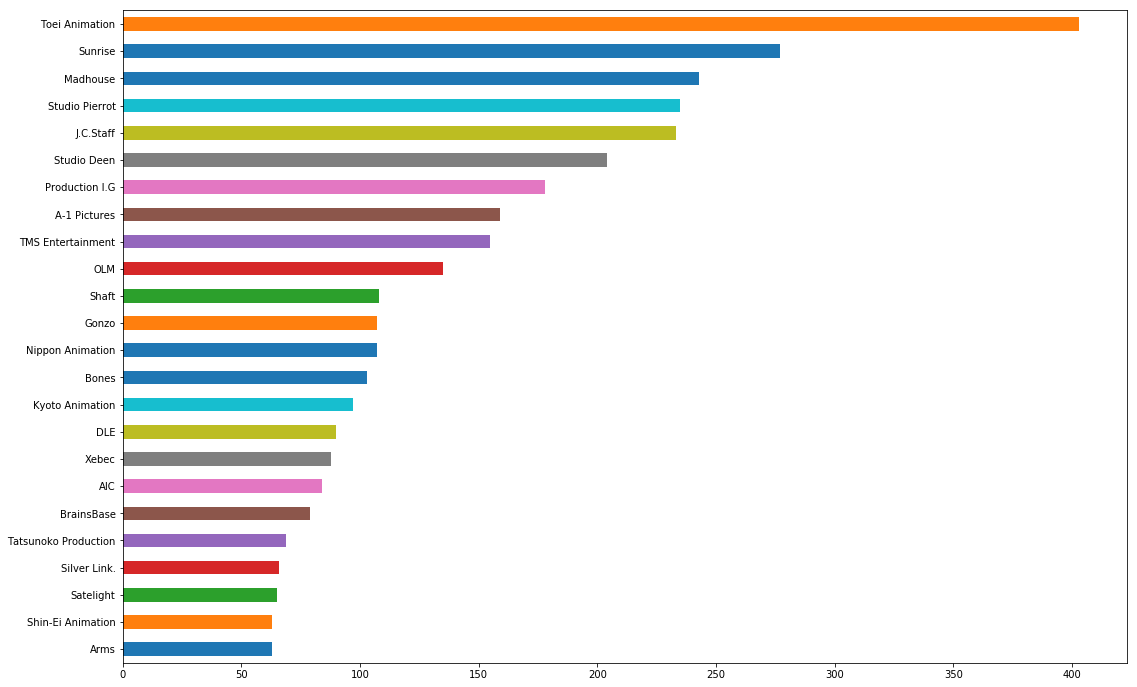

In [19]:
animes[animes['studios'].isin(FamousStudios)]['studios'].value_counts(ascending=True).plot(kind='barh', figsize=(18, 12) )

Avec près de 403 animés, la **Toei Animation** écrase largement toute concurrence en terme de production d'animés. Son plus proche concurrent en est à 273.
Créé en 1948, l'ancienneté de ce géant de l'animation nippone couplée à sa politique orientée sur la production massive d'animés, semble expliquer le large panel d'animés qu'il possède dans son écurie.


Cependant, nous sommes bien conscients que produire plus d'une centaine n'est pas signe de hasard, et "peut être" signe d'une bonne santé économique. Au vu du nombre d'animés produits par chacun de ces studios nous nous demandons alors quels sont les  animés phares de chacun de ces studios. 

Encore une fois nous avons réalisé une sous sélection. Pour l'étude suivante, nous ne prenons que les 5 premiers studios du classement, à savoir : *Toei Animation*, *Sunrise*, *Madhouse*, *Studio Pierrot* et *J.C.Staff*.

In [20]:
TopFiveStudios=FamousStudios[:5]
for studio in TopFiveStudios:
    known_animes = animes[animes['studios'] == studio].sort_values('members', ascending=False)[:3] # On trie par la taille de la communauté de l'animé
    print(studio)
    imagesList=''.join(["<figure style='max-width: 225px; text-align:center; float: left;'><img style='margin: 0px; ' src='%s'/><figcaption>%s</figcaption></figure>" % (anime['image_url'].replace('myanimelist.cdn-dena.com', 'cdn.myanimelist.net'), anime['title']) 
                     for _, anime in known_animes.iterrows()])
    display(HTML(imagesList))

Toei Animation


Sunrise


Madhouse


Studio Pierrot


J.C.Staff


A partir des URL présents dans la base de données, nous avons importé les affiches du top3 des animés ayant les plus grandes communautés de fans pour chacun des 5 plus grands studios d'animation

Sans étonnement, nous remarquons que les 5 plus "grands" studios sont auteurs d'animés qui pour beaucoup sont entrés dans la culture populaire : ils ont su s'installer dans la durée et dans le coeur des divers fans à travers le monde ce qui est le cas des franchises *One Piece* et *Dragon Ball*, toute deux produites ( comme par hasard ) par la Toei.

Créés dans les années 70, les *Studio Pierrot* et *Madhouse* ne sont pas en reste également. En effet, nous leur devons les adaptations d'animés assez populaires aussi comme *Bleach* , *Naruto* et du plus récent *Tokyo Ghoul* pour le premier; *Death Note*, *One Punch Man* et *No Game No Life* pour le second.

Comme nous pouvons le constater, TOEI a produit des animés culte mais a besoin de se renouveller si elle ne veut pas perdre face à des concurrents de plus en plus féroces. On parle notamment des studios Madhouse, qui, ces dernières années produisent des animés qui, en plus d'être originaux semblent avoir trouvé leur public également.

Au sortir de cette étude, nous remarquons que 15 animés présentées, sont issus pour la majorité de mangas. Leur forte communauté de fans qu'elle génère est-elle liée à cela ?  

### Les Sources

Avant de répondre à cette interrogation nous allons étudier tout d'abord les sources des animés. 

In [21]:
TopSources=animes['source'].value_counts().sort_values(ascending=False)
save=TopSources
TopSources.to_frame(name='Nombre d\'animés')

,Nombre d'animés
Manga,2493
Original,1789
Light novel,512
Visual novel,482
Game,424
Novel,282
4-koma manga,194
Other,170
Web manga,111
Music,55


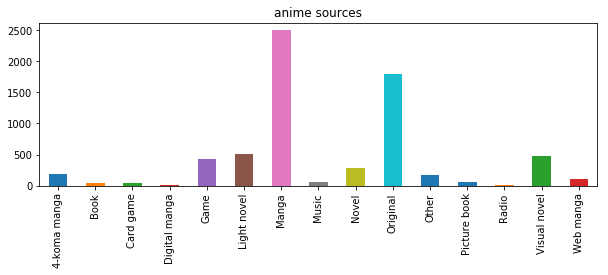

In [22]:
animes['source'].value_counts().sort_index().plot.bar(figsize=(10, 3), title='anime sources')

Ce graphe nous suggère que les animés sont largements issus de sources au public plus ou moins eclectique. L'adaptation des mangas en animés semble logique et il n'est donc pas étonnant que cette source se trouve en première place , avec quasiment 2500 animés issus des oeuvres littéraires.
En deuxième position nous avons les adaptations d'originales.

In [23]:
n=6 
print('Les {:d} plus grandes sources représentent {:f}% de la production d\'animés.'.
      format(n,100*save[:n].sum()/save.sum() ) )
TopSources=save[:n]
TopSources=[i for i in TopSources.index]
print('Il s\' agit de :',TopSources )

Les 6 plus grandes sources représentent 89.712058% de la production d'animés.
Il s' agit de : ['Manga', 'Original', 'Light novel', 'Visual novel', 'Game', 'Novel']


Ainsi pour la suite de notre étude, nous allons retenir ces 6 sources.

### Lien Popularité Studio - Source

Ici nous essayons de connaitre la spécialité et au passage d'essayer de déceler un quelconque lien entre la taille d'un studio et la source qu'il adapte.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

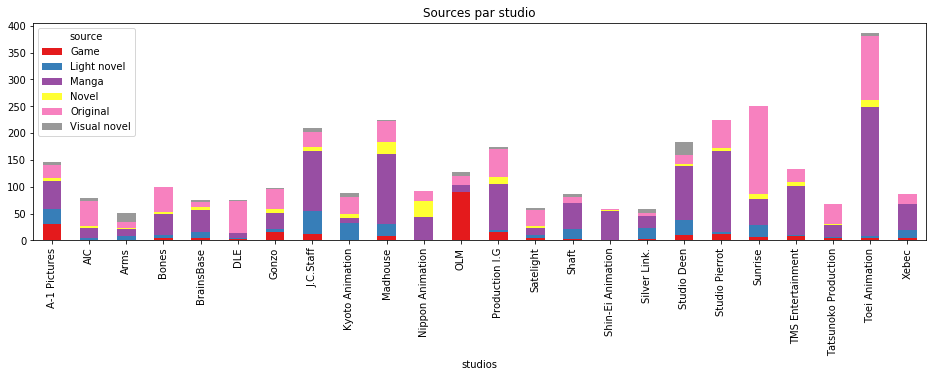

In [24]:
studios_sources=pd.crosstab(animes['studios'], animes['source'])  # On realise un croisement entre les sources et les studios
# Compte le nombre de sources pour chaque studio : Col: Source et Ligne : Studios

# TopSources = ['Game', 'Light novel', 'Manga', 'Original', 'Visual novel']
other_sources = list(set(studios_sources.columns) - set(TopSources))
studios_sources = studios_sources.drop(other_sources, axis=1)

studios_sources = studios_sources[studios_sources.index.isin(FamousStudios)]

colors = plt.cm.Set1(np.linspace(0, 1, studios_sources.shape[1])) # On change les couleurs du plot
studios_sources.plot.bar(stacked=True, figsize=(16, 4), title='Sources par studio', color=colors)
plt.xticks(rotation=90)

Les studios ont une forte tendance à adapter des mangas.

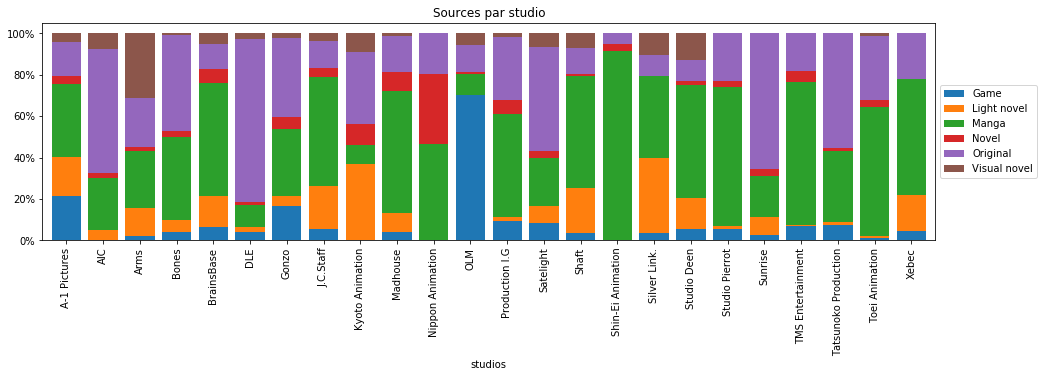

In [25]:
studios_sources.div(studios_sources.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(16, 4), title='Sources par studio', width=0.8)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

Les sources reines sont les mangas et les histoires originales.
Les studios, afin de s'assurer de rentrer dans leur frais "semblent" avoir pris la voie de la sûreté en adaptant des mangas en l'écran afin de rallier les fans du mangas adapté. En effet, ceux-ci ayant une fanbase déjà établie, la transition mangas - animés devraient se faire beaucoup plus facilement pour ceux-ci : ils ne sont pas en terrains inconnus.

Ce choix semble porter ses fruits car 4 des 5 plus grands studios d'animations on fait de l'adaptation des mangas leur fond de commerce.

Parmis les studios les plus connus, les plus innovants sont DLE (*Rocket Girls* , *Eagle Talon*) et Sunrise ( *Nicky Larson*, *Inu-Yasha*, *Code Geass* ).

Mais les fans d'animés veulent-ils vraiment des adaptations de mangas ? Ne veulent-ils pas des animés originaux ?

Afin d'évaluer cette hypothèse, nous allons étudier de plus près les sources en fonction des années .

### Sources et année

Pour la suite de notre étude nous essayerons de voir l'évolution des sources des animés diffusés en fonction de l'année

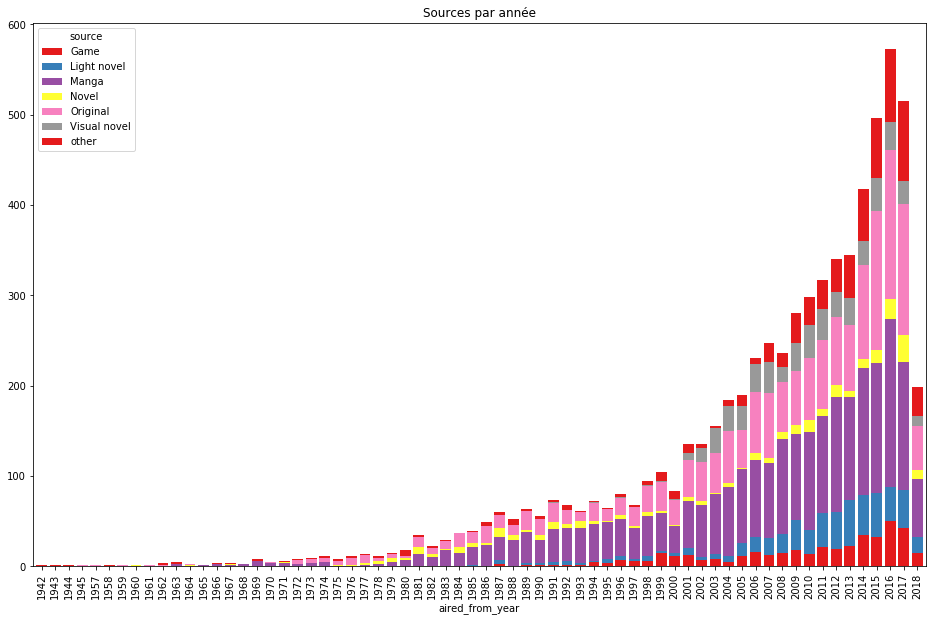

In [26]:
year_source = pd.crosstab(animes['aired_from_year'], animes['source'])
year_source.index = year_source.index.astype(np.int)

#Rappel : TopSources = ['Game', 'Light novel', 'Manga', 'Original', 'Visual novel']
other_sources = list(set(year_source.columns) - set(TopSources))
year_source['other'] = year_source[other_sources].sum(axis=1)
year_source = year_source.drop(other_sources, axis=1)
year_source.plot(kind='bar', stacked=True, figsize=(16, 10), title='Sources par année', color=colors, width=0.8)

Nous allons nous pencher de plus prêt sur les années post 2010

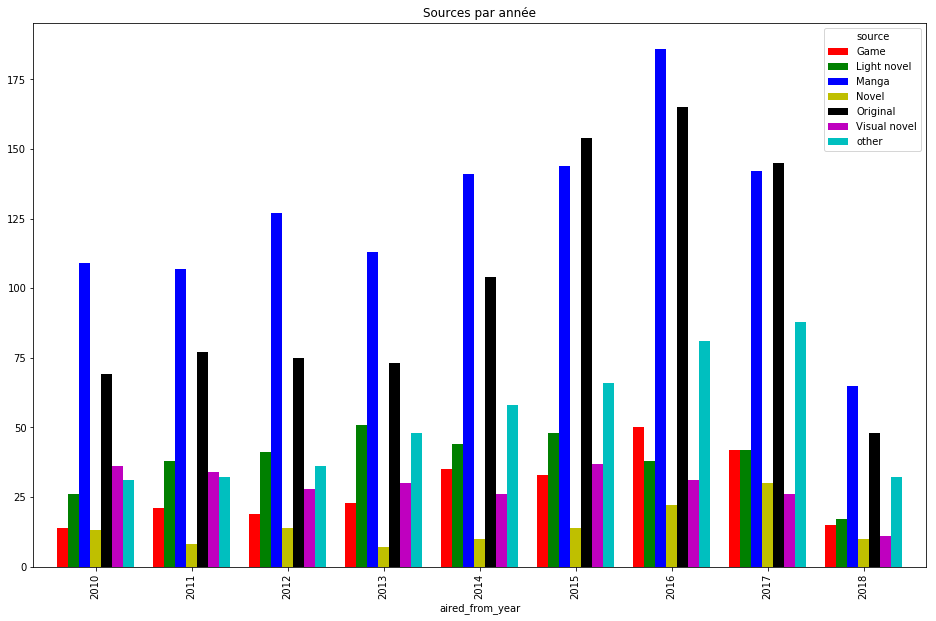

In [27]:
colors2='rgbykmc' 
year_source[year_source.index >= 2010].plot(kind='bar', stacked=False, figsize=(16, 10), title='Sources par année', color=colors2, width=0.8)

La production d'animés originaux est de plus en plus grande au détrinent : L'avenir des animés se trouve t'il dans ce genre de sources ? 

### Les animés les plus populaires 

In [28]:
animesPopular=animes.sort_values('popularity')[['title', 'type', 'source','studios' ,'popularity', 'status', 'members','aired_from_year']]#.head(30)
display(animesPopular.head(30))


,title,type,source,studios,popularity,status,members,aired_from_year
anime_id,,,,,,,,
1535,Death Note,TV,Manga,Madhouse,1,Finished Airing,1456378,2006.0
16498,Shingeki no Kyojin,TV,Manga,Wit Studio,2,Finished Airing,1345842,2013.0
11757,Sword Art Online,TV,Light novel,A-1 Pictures,3,Finished Airing,1301616,2012.0
5114,Fullmetal Alchemist: Brotherhood,TV,Manga,Bones,4,Finished Airing,1199091,2009.0
30276,One Punch Man,TV,Web manga,Madhouse,5,Finished Airing,1020754,2015.0
22319,Tokyo Ghoul,TV,Manga,Studio Pierrot,6,Finished Airing,1013138,2014.0
6547,Angel Beats!,TV,Original,P.A. Works,7,Finished Airing,1010771,2010.0
9253,Steins;Gate,TV,Visual novel,White Fox,8,Finished Airing,1010330,2011.0
1575,Code Geass: Hangyaku no Lelouch,TV,Original,Sunrise,9,Finished Airing,986897,2006.0


A notre grande surprise, aucun animé de la Toei Animation ne se trouve dans le top 30 des animés les plus populaires.  

Nous venons alors à nous poser des questions sur ce studio.

## Questionnements sur le cas de la TOEI Animation

In [29]:
animesPopular[ animesPopular['studios']=='Toei Animation' ].head()

,title,type,source,studios,popularity,status,members,aired_from_year
anime_id,,,,,,,,
21,One Piece,TV,Manga,Toei Animation,35,Currently Airing,720133,1999.0
813,Dragon Ball Z,TV,Manga,Toei Animation,70,Finished Airing,534974,1989.0
223,Dragon Ball,TV,Manga,Toei Animation,99,Finished Airing,444597,1986.0
225,Dragon Ball GT,TV,Manga,Toei Animation,204,Finished Airing,305320,1996.0
2034,Lovely★Complex,TV,Manga,Toei Animation,209,Finished Airing,301904,2007.0


L'animé le plus populaire de la Toei  (*One Piece*)  se trouve à la 35e place dans le classement de popularité d'animés alors que sa version manga quant à elle fait partie des plus populaires au monde . 

Ces résultats peuvent paraître assez déroutants car, au vu du nombre d'animés produits, il était légitime que l'on s'attende à ce que les productions de la Toei fassent parti des plus populaires : Ce n'est pas du tout le cas. La *Toei* est la parfaite illustration du fait que la quantité ne rime pas forcément avec la qualité.

Avec sa politique axée sur la production massive de séries, elle semble se disperser dans ses oeuvres, elle ne sait plus sur quel pied danser. Combien de ses animés sont-ils arrêtés au bout de quelques épisodes par faute d'audience ?

Combien arrivent à tirer leur épingle du jeu ? Apparamment aucun hormis *One Piece* qui est exploité depuis 1999. 

Jusqu'à quand l'exploitation continuera t'elle ? Qu'adviendra t'il du studio à la fin d'adaptation de ce manga ? Au regard du déclin du studio, les droits d'adaptation de sa série phare ne peuvent-ils pas lui être retirés ? Cela signerait un coup dur pour ce studio qui risquerait de ne plus se relever. 

La Toei aujourd'hui est surtout connue pour ses anciennes gloires avec l'âge d'or du dessin animé japonais (années 80-90) : en plus de ces animés phares, elle a produit entre autres *Saint Seiya*, *Ken Le Survivant* sans oublier *Dr.Slump*.

Elle n'a pas su s'affranchir de ses anciennes franchises. Fait illustré par l'exploitation (parfois mal faite) d'anciennes licences. On a notamment le cas de *Dragon Ball Z* qui subit maintes déclinaisons pas forcément légitimes. Le mécontentement des fans face au travail de la Toei n'arrange également en rien la situation. Elle a pas eu assez de recul pour prévoir à long terme et s'assurer une certaine stabilité.

*Sunrise* et *Maddhouse*, cadets de la *Toei* (en terme d'ancienneté), avec près de 1000 animés de moins sont aujourd'hui leaders de l'animation japonaise. Serait-ce à cause des choix artistiques ? des sources ? Pour ces 2 leaders, nous avons 2 approches tout à fait différentes. D'une part, comme nous vous l'avons montré dans les études précédentes,  on a les studios *Sunrise* qui empruntent clairement une voie des originaux, et l'autre, Maddhouse, qui, dans un chemin plus classique (adapter des mangas en animé) a quand même su se hisser au top. </p>

La Toei n'a peut être pas répondu présente au bon moment, elle n'a pas su rester dans l'air du temps et cela a causé son effondrement. Bien vrai que l'industrie de l'animation est en crise depuis la fin des années 90, la Toei semble avoir été celle qui a le plus ressenti cette crise.

Mais peut-elle encore se relever pour retrouver sa place de leader ? N'est-il pas trop tard pour elle ? 

Aujourd'hui, sans trop s'éloigner de son modèle classique, la Toei essaie tant bien que mal de revenir sur le devant de la scène en mettant un cap vers les créations d'animés originaux, preuve en est du récent concours (Juin 2019) lancé aux fans pour définir un concept d'animé original qui pourrait être tête d'affiche et durer 100 ans ( http://www.9emeart.fr/post/news/animation/toei-animation-dragon-ball-one-piece-sailor-moon-cherche-un-concept-pour-une-serie-animee-qui-pourrait-durer-cent-ans-10737 ). Elle semble consciente du fait que pour revenir au top, il lui faudrait bien plus qu'un *Dragon Ball* ou *One Piece*.

Nostalgique de son passé, la Toei par ce concours semble vouloir créer un animé qui s'installera dans la continuité comme elle a su le faire avec ses animés cultes mais qui sera issu d'une histoire originale contrairement à ces derniers qui eux sont issus de mangas. Est-ce la bonne solution ? Seul l'avenir nous le dira.

## 4. Pourquoi ces données ?

Nous cherchions des données assez "fun" à étudier. Malheureusement, après près d'une heure de recherche nous n'avions toujours pas trouvé notre bonheur sur data.opendatasoft.com. 
    
Rimbésougri étant fan d'animés, il a dit ironiquement qu'il aurait aimé pouvoir faire ce travail sur une base de données en lien avec cet univers. 
Alenka, après une brève recherche sur le net, a trouvé une base de données sur le sujet : base de données se trouvant sur Kaggle. Tout de suite, nous avons été hyper enthousiastes à l'idée de travailler avec suite à l'aval de notre professeur.